In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [152]:
data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(10000).sort_values(['state'])

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\4087525321.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(10000).sort_values(['state'])


In [88]:
data.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
1354,021302,2020/03/27,AK,021302,PROVIDENCE SEWARD MEDICAL CENTER,"417 FIRST AVENUE, PO BOX 365",SEWARD,99664.0,Critical Access Hospitals,2210.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2764,021307,2020/05/08,AK,021307,CORDOVA COMMUNITY MEDICAL CENTER,PO BOX 160 - 602 CHASE AVENUE,CORDOVA,99574.0,Critical Access Hospitals,2080.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4892,021302,2020/07/03,AK,021302,PROVIDENCE SEWARD MEDICAL CENTER,"417 FIRST AVENUE, PO BOX 365",SEWARD,99664.0,Critical Access Hospitals,2210.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
3825,021304,2020/03/27,AK,021304,PETERSBURG MEDICAL CENTER,PO BOX 589,PETERSBURG,99833.0,Critical Access Hospitals,2280.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4329,020006,2020/05/08,AK,020006,MAT-SU REGIONAL MEDICAL CENTER,2500 SOUTH WOODWORTH LOOP,PALMER,99645.0,Short Term,2170.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [153]:
data['total_patients_hospitalized_confirmed_influenza_7_day_sum'].sort_values().dropna()

9693   -999999.0
9130   -999999.0
9406   -999999.0
9082   -999999.0
9132   -999999.0
          ...   
9267       106.0
9787       108.0
9830       120.0
9814       157.0
9153       194.0
Name: total_patients_hospitalized_confirmed_influenza_7_day_sum, Length: 802, dtype: float64

## Data Processing for State

In [144]:
sliced = data[['inpatient_beds_used_covid_7_day_sum', 

                'all_adult_hospital_inpatient_beds_7_day_sum',
                'total_beds_7_day_sum', 
                'inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum']]
sliced

,inpatient_beds_used_covid_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,inpatient_beds_7_day_sum
1354,NaN,NaN,11.0,0.0,11.0
2764,0.0,NaN,91.0,12.0,91.0
4892,0.0,NaN,97.0,-999999.0,77.0
3825,NaN,NaN,12.0,4.0,12.0
4329,33.0,NaN,672.0,487.0,612.0
...,...,...,...,...,...
3280,0.0,NaN,112.0,27.0,112.0
3279,15.0,NaN,623.0,212.0,413.0
3278,-999999.0,NaN,448.0,156.0,448.0
2471,11.0,NaN,623.0,145.0,413.0


In [29]:
sliced['inpatient_beds_used_covid_7_day_sum'].isna().sum()
(sliced['inpatient_beds_used_covid_7_day_sum'] < 0).sum()

def ifZero(x):
    if x < 0:
        return 0
    return x

In [111]:
psliced = sliced.dropna()
psliced= psliced.applymap(lambda x: ifZero(x))
psliced

,inpatient_beds_used_covid_7_day_sum,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,inpatient_beds_7_day_sum
2764,0.0,91.0,12.0,91.0
4892,0.0,97.0,0.0,77.0
4329,33.0,672.0,487.0,612.0
1684,0.0,420.0,89.0,355.0
1683,0.0,84.0,5.0,84.0
...,...,...,...,...
3280,0.0,112.0,27.0,112.0
3279,15.0,623.0,212.0,413.0
3278,0.0,448.0,156.0,448.0
2471,11.0,623.0,145.0,413.0


Determine if there are linear correlations?

In [112]:
y = np.array(psliced['inpatient_beds_used_covid_7_day_sum'])
y

array([ 0.,  0., 33., ...,  0., 11., 51.])

In [134]:
X_1 = np.array(psliced['total_beds_7_day_sum'])

X_2 = np.array(psliced['inpatient_beds_used_7_day_sum'])
X_3 = np.array(psliced['inpatient_beds_7_day_sum'])


X_1 = X_1
# X_2 = np.log(X_2)

## Logorithmic relationship between X_1 and y

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\3021494527.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(X_1), np.log(y))


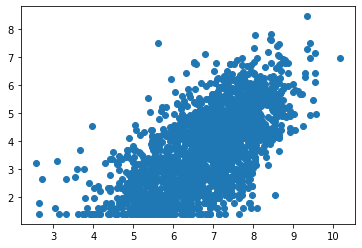

In [154]:
plt.scatter(np.log(X_1), np.log(y))

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\3357389379.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(X_2), np.log(y), color='red')


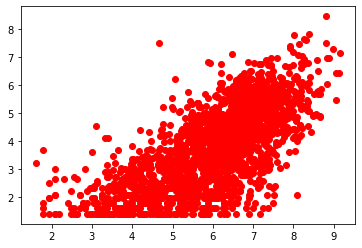

In [140]:
plt.scatter(np.log(X_2), np.log(y), color='red')

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\3451929315.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(X_3), np.log(y), color='green')


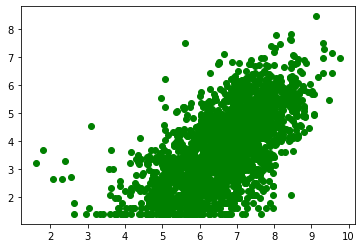

In [142]:
plt.scatter(np.log(X_3), np.log(y), color='green')

## NOTE: using avg has less clustering effect than sum!